In [1]:
from torch import nn, optim
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler  

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score

c:\Users\User\Desktop\github\stable_diffusion\environment\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
col_names = ['unit_number',
             'time',
             'operational_setting_1',
             'operational_setting_2',
             'operational_setting_3',
             'sensor_measurement_1',
             'sensor_measurement_2',
             'sensor_measurement_3',
             'sensor_measurement_4',
             'sensor_measurement_5',
             'sensor_measurement_6',
             'sensor_measurement_7',
             'sensor_measurement_8',
             'sensor_measurement_9',
             'sensor_measurement_10',
             'sensor_measurement_11',
             'sensor_measurement_12',
             'sensor_measurement_13',
             'sensor_measurement_14',
             'sensor_measurement_15',
             'sensor_measurement_16',
             'sensor_measurement_17',
             'sensor_measurement_18',
             'sensor_measurement_19',
             'sensor_measurement_20',
             'sensor_measurement_21',
             'sensor_measurement_22',
             'sensor_measurement_23',
             'sensor_measurement_24',
             'sensor_measurement_25',
             'sensor_measurement_26',
             'td',
             'td2']

In [3]:
df = pd.read_csv(r'.\CMaps\train_FD001.txt', sep=' ', names = col_names)
df = df[col_names[:-7]]

for_split = round(len(df['unit_number'].unique())/2)
df_train = df[df['unit_number']<=for_split]

dict_max_time = df_train.groupby('unit_number')['time'].max().to_dict()
df_train['to_keep'] = df_train.apply(lambda row: dict_max_time[row['unit_number']]-row['time']>=20 , axis=1)
df_train = df_train[df_train['to_keep']==True].drop('to_keep', axis=1)

df_test = df[df['unit_number']>for_split]

C:\Users\User\AppData\Local\Temp\ipykernel_11848\2697341255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['to_keep'] = df_train.apply(lambda row: dict_max_time[row['unit_number']]-row['time']>=20 , axis=1)


In [4]:
df_train

,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,50,174,0.0039,-0.0006,100.0,518.67,643.32,1600.74,1417.92,14.62,...,520.56,2388.12,8172.10,8.5058,0.03,396,2388,100.0,38.57,23.1725
9885,50,175,0.0028,0.0002,100.0,518.67,643.00,1597.26,1417.15,14.62,...,520.66,2388.17,8167.99,8.4518,0.03,397,2388,100.0,38.63,23.0842
9886,50,176,-0.0009,-0.0000,100.0,518.67,643.56,1599.13,1422.81,14.62,...,520.56,2388.14,8175.49,8.5150,0.03,395,2388,100.0,38.64,23.0654
9887,50,177,-0.0009,-0.0005,100.0,518.67,643.40,1594.05,1414.26,14.62,...,520.97,2388.12,8172.80,8.4537,0.03,396,2388,100.0,38.68,23.1364


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(df_train.values[:,2:])
df_test_scaled = scaler.transform(df_test.values[:,2:])

input_size = df_train_scaled.shape[1]



In [7]:
train = torch.tensor(df_train_scaled.astype(np.float32)) 
train_dataset =  torch.utils.data.TensorDataset(train)
test = torch.tensor(df_test_scaled.astype(np.float32)) 
test_dataset =  torch.utils.data.TensorDataset(test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=200, shuffle=True, num_workers=4
)

test_loader = torch.utils.data.DataLoader(

    test_dataset, batch_size=200, shuffle=False, num_workers=4
)




In [8]:
class AutoEncoder(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.l1 = nn.Linear(
            in_features=kwargs["input_shape"], out_features=100
        )
        self.l1_drop = nn.AlphaDropout()
        self.l2 = nn.Linear(
            in_features=100, out_features=5
        )
        self.l2_drop = nn.AlphaDropout()
        self.l3 = nn.Linear(
            in_features=5, out_features=100
        )
        self.l3_drop = nn.AlphaDropout()
        self.l4 = nn.Linear(
            in_features=100, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        l1_f = self.l1(features)
        a_l1_f = torch.relu(l1_f)
        l1_f_d = self.l1_drop(a_l1_f)

        l2_f = self.l2(l1_f_d)
        a_l2_f = torch.relu(l2_f)
        l2_f_d = self.l1_drop(a_l2_f)

        l3_f = self.l3(l2_f_d)
        a_l3_f = torch.relu(l3_f)
        l3_f_d = self.l1_drop(a_l3_f)

        l4_f = self.l4(l3_f_d)
        a_l4_f = torch.relu(l4_f)
        return a_l4_f

In [9]:
#use GPU

model = AutoEncoder(input_shape=input_size).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)

loss = nn.MSELoss()

In [10]:
device

device(type='cuda')

In [11]:
epochs = 30

for epoch in range(epochs):
    loss_epoch = 0
    for inputs in train_loader:
        # load it to the active device
        inputs = inputs[0].view(-1, input_size).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        batch_loss = loss(outputs, inputs)
        batch_loss.backward()
        optimizer.step()
        loss_epoch += batch_loss.item()
    loss_epoch = loss_epoch / len(train_loader)
    
    print(f"epoch : {epoch + 1}/{epochs}, loss = {loss_epoch}")

epoch : 1/30, loss = 0.7228436456786261
epoch : 2/30, loss = 0.698697977595859
epoch : 3/30, loss = 0.672398755285475
epoch : 4/30, loss = 0.6563814931445652
epoch : 5/30, loss = 0.6429325501124065
epoch : 6/30, loss = 0.6342993007765876
epoch : 7/30, loss = 0.6307211067941454
epoch : 8/30, loss = 0.6305661294195387
epoch : 9/30, loss = 0.6301200946172079
epoch : 10/30, loss = 0.629797429508633
epoch : 11/30, loss = 0.6258186247613695
epoch : 12/30, loss = 0.6280463947190179
epoch : 13/30, loss = 0.627769320540958
epoch : 14/30, loss = 0.6267474624845717
epoch : 15/30, loss = 0.6245013912518819
epoch : 16/30, loss = 0.624713295035892
epoch : 17/30, loss = 0.6244987527529399
epoch : 18/30, loss = 0.6249783555666606
epoch : 19/30, loss = 0.6253347900178697
epoch : 20/30, loss = 0.6225978467199538
epoch : 21/30, loss = 0.623875700102912
epoch : 22/30, loss = 0.6236793743239508
epoch : 23/30, loss = 0.6236375517315335
epoch : 24/30, loss = 0.6234408802456326
epoch : 25/30, loss = 0.6230583

In [12]:
preds = model.cpu()(test.to('cpu')).detach().numpy()
reals = df_test_scaled

In [13]:
reconstruction_error = np.sqrt(np.mean((preds-reals)**2,axis=1))
reconstruction_error

array([0.89942523, 0.86305923, 1.52253363, ..., 1.4167862 , 1.78081173,
       2.08205326])

In [14]:
def calculate_precison_for_window_size(ttf=10):

    df_for_testing = df_test[['unit_number', 'time']]

    dict_max_time = df_test.groupby('unit_number')['time'].max().to_dict()
    df_for_testing['ttf'] = df_for_testing.apply(lambda row: dict_max_time[row['unit_number']]-row['time']<=ttf , axis=1)

    df_for_testing['reconstruction_error'] = reconstruction_error

    slice_unit_number = round((df_for_testing['unit_number'].max()+df_for_testing['unit_number'].min())/2)

    df_for_tresh = df_for_testing[df_for_testing['unit_number']<slice_unit_number]
    df_for_graph = df_for_testing[df_for_testing['unit_number']>=slice_unit_number].iloc[:1993]

    tresh = df_for_tresh['reconstruction_error'].quantile(0.90)

    df_for_graph['treshhold'] = df_for_testing['ttf']*tresh

    df_for_graph['reconstruction_over_treshhold'] = df_for_graph['reconstruction_error']>=tresh

    return precision_score(df_for_graph['ttf'], df_for_graph['reconstruction_over_treshhold']),\
           recall_score(df_for_graph['ttf'], df_for_graph['reconstruction_over_treshhold']),\
           f1_score(df_for_graph['ttf'], df_for_graph['reconstruction_over_treshhold'])


In [ ]:
precisions = []
recalls = []
f1 = []

for i in range(1,200):
    p,r,f = calculate_precison_for_window_size(i)
    precisions.append(p)
    recalls.append(r)
    f1.append(f)
    print(i)

Text(0.5, 1.0, 'PRECISION VS WINDOW')

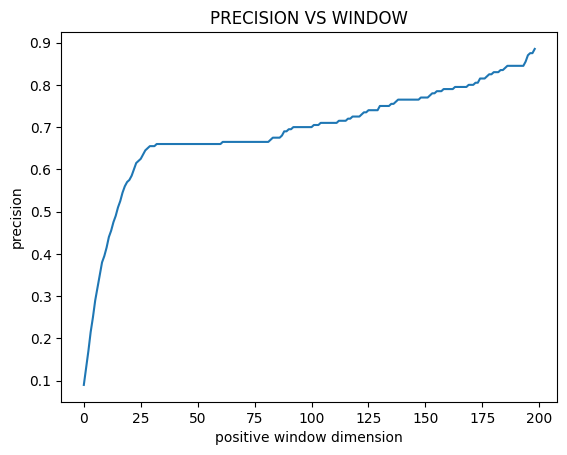

In [31]:
plt.plot(precisions)
plt.xlabel('positive window dimension')
plt.ylabel('precision')
plt.title('PRECISION VS WINDOW')

Text(0.5, 1.0, 'RECALL VS WINDOW')

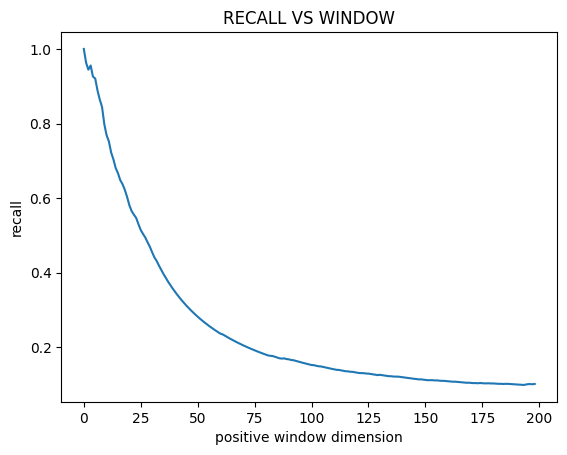

In [32]:
plt.plot(recalls)
plt.xlabel('positive window dimension')
plt.ylabel('recall')
plt.title('RECALL VS WINDOW')

Text(0.5, 1.0, 'F1 VS WINDOW')

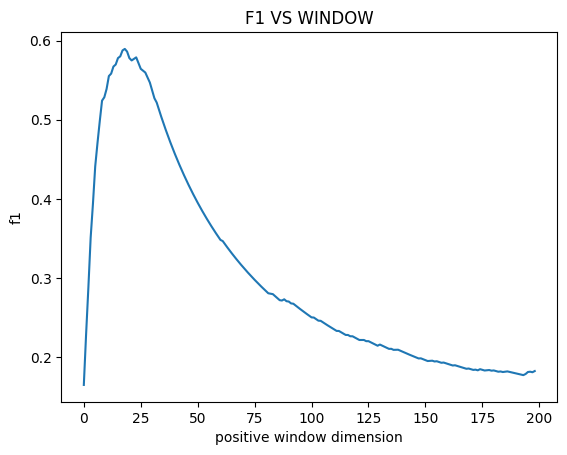

In [33]:
plt.plot(f1)
plt.xlabel('positive window dimension')
plt.ylabel('f1')
plt.title('F1 VS WINDOW')

In [ ]:
TTF = 30


df_for_testing = df_test[['unit_number', 'time']]

dict_max_time = df_test.groupby('unit_number')['time'].max().to_dict()
df_for_testing['ttf'] = df_for_testing.apply(lambda row: dict_max_time[row['unit_number']]-row['time']<=TTF , axis=1)

df_for_testing['reconstruction_error'] = reconstruction_error

slice_unit_number = round((df_for_testing['unit_number'].max()+df_for_testing['unit_number'].min())/2)

df_for_tresh = df_for_testing[df_for_testing['unit_number']<slice_unit_number]
df_for_graph = df_for_testing[df_for_testing['unit_number']>=slice_unit_number]


tresh = df_for_tresh['reconstruction_error'].quantile(0.90)

df_for_graph['treshhold'] = df_for_testing['ttf']*tresh

df_for_graph['reconstruction_over_treshhold'] = df_for_graph['reconstruction_error']>=tresh


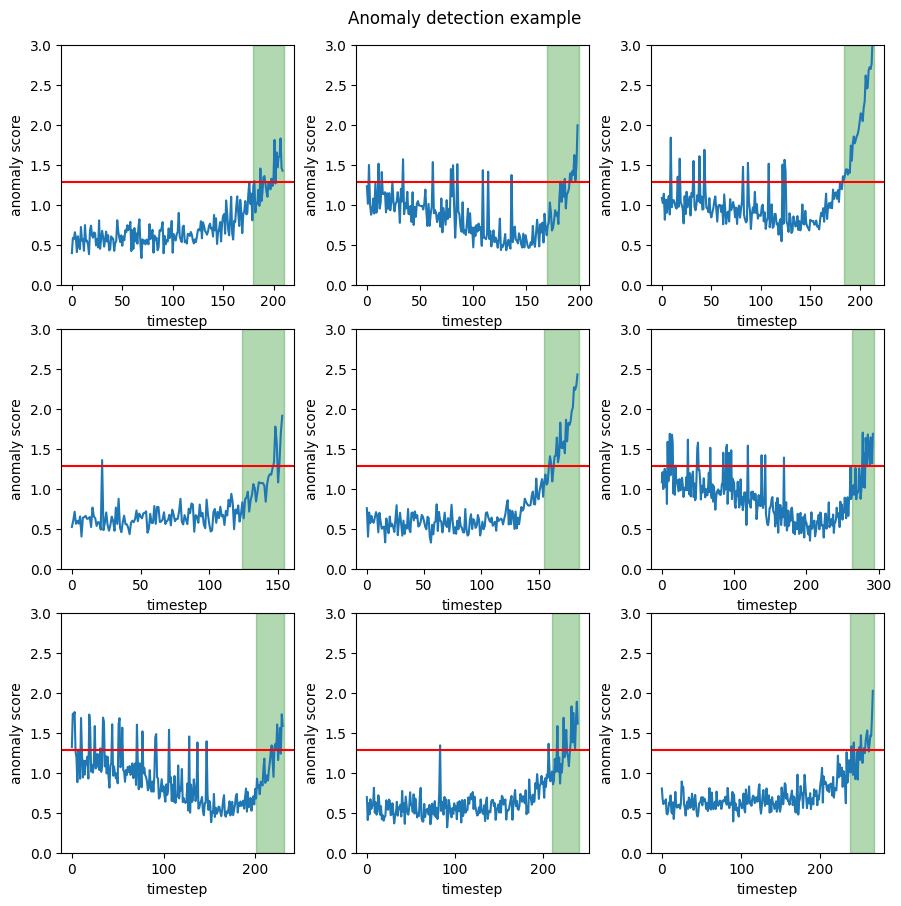

In [68]:
df_for_graph = df_for_graph[['reconstruction_error', 'treshhold', 'unit_number', 'time']].iloc[0:1993]

unit_numbers = df_for_graph['unit_number'].unique()

fig, ax = plt.subplots(3, 3,  figsize=(9, 9))
fig.suptitle('Anomaly detection example')
fig.tight_layout()
for i, id in enumerate(unit_numbers):

    ax_t = ax[i%3, int(i/3)]
    data = list(df_for_graph[df_for_graph['unit_number']==id]['reconstruction_error'])
    ax_t.plot(data)
    ax_t.axhline(tresh, c='r')
    ax_t.set_ylim(0,3)

    ax_t.set_xlabel('timesteps')
    ax_t.set_ylabel('anomaly score')

    ax_t.axvspan(len(data)-TTF, len(data), alpha=0.3, color='green')
    
plt.show()
# df_for_graph[['reconstruction_error', 'treshhold']].iloc[0:1993].plot(figsize=(10,3))

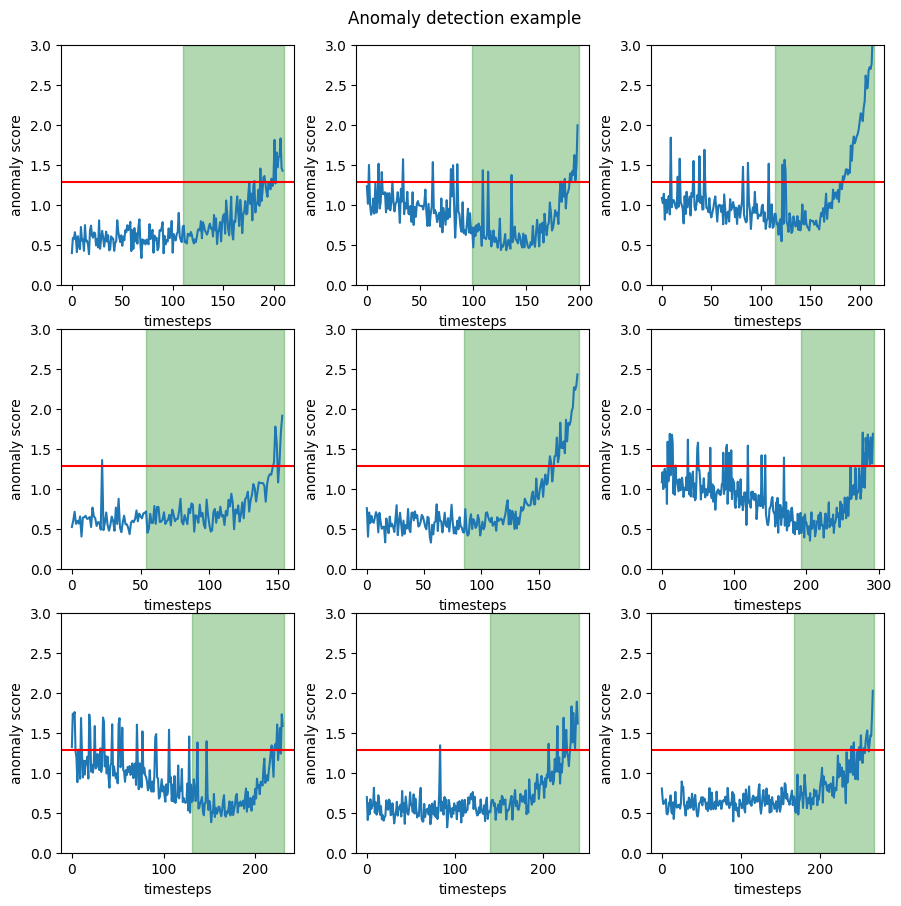

In [93]:
df_for_graph = df_for_graph[['reconstruction_error', 'treshhold', 'unit_number', 'time']].iloc[0:1993]

unit_numbers = df_for_graph['unit_number'].unique()

fig, ax = plt.subplots(3, 3,  figsize=(9, 9))
fig.suptitle('Anomaly detection example')
fig.tight_layout()
for i, id in enumerate(unit_numbers):

    ax_t = ax[i%3, int(i/3)]
    data = list(df_for_graph[df_for_graph['unit_number']==id]['reconstruction_error'])
    ax_t.plot(data)
    ax_t.axhline(tresh, c='r')
    ax_t.set_ylim(0,3)

    ax_t.set_xlabel('timesteps')
    ax_t.set_ylabel('anomaly score')

    ax_t.axvspan(len(data)-100, len(data), alpha=0.3, color='green')
    
plt.show()

# The second way

In [21]:
df_for_method_2 = df_for_graph[['reconstruction_error', 'treshhold', 'unit_number', 'time', 'reconstruction_over_treshhold']].iloc[0:1993]

In [22]:
df_for_method_2['time_2'] = df_for_method_2['time'].shift(-1)

In [23]:
df_for_method_2['faliure'] = (df_for_method_2['time']-df_for_method_2['time_2'])!=-1
df_for_method_2['faliure'].iloc[0] = False

C:\Users\User\AppData\Local\Temp\ipykernel_11848\2754338608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_method_2['faliure'].iloc[0] = False


In [24]:
df_for_method_2['is_posive'] = df_for_method_2['reconstruction_over_treshhold']<df_for_method_2['reconstruction_over_treshhold'].shift(-1)
P = df_for_method_2['is_posive'].sum()

In [25]:
TP = ((df_for_method_2['reconstruction_over_treshhold'] == True) & (df_for_method_2['faliure'] == True)).sum()

In [26]:
FN = ((df_for_method_2['reconstruction_over_treshhold'] == False) & (df_for_method_2['faliure'] == True)).sum()

In [27]:
precison_time = TP/P
precison_time

0.0989010989010989

In [28]:
recall_time = TP/(TP+FN)
recall_time

1.0

In [29]:
f1_score = (precison_time*recall_time*2)/(recall_time+precison_time)
f1_score

0.17999999999999997